In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_l_bfgs_b

We define $f(x) = \frac{1}{2}x^2$ and $h(x) = \frac{1}{2}(1+\delta)(x - \frac{\zeta}{1+\delta})^2$

In [3]:
class funcf:
    def __call__(self,x):
        return 0.5 * x**2
    def grad(self,x):
        return x

class funch:
    def __init__(self,d,z):
        self.d = d #delta
        self.z = z #zeta
        
    def __call__(self,x):
        return .5 * (1 + self.d) * (x - self.z/(1 + self.d))**2
    
    def grad(self,x):
        return (1 + self.d) * (x - self.z/(1 + self.d))

In [4]:
def Naive(T,K,eta,f,h,x0=1):
    O = []
    x = x0
    O.append(f(x))
    for t in range(T):
        gf = f.grad(x)
        gh = h.grad(x)
        y = x
        for k in range(K):
            g = gf if k==0 else h.grad(y)
            y -= eta * g
        x = y
        O.append(f(x))
    return O

In [5]:
def Alg(T,K,eta,f,h,x0=1):
    O = []
    x = x0
    O.append(f(x))
    for t in range(T):
        gf = f.grad(x)
        gh = h.grad(x)
        y = x
        for k in range(K):
            g = h.grad(y) - gh + gf
            y -= eta * g
        x = y
        O.append(f(x))
    return O

In [9]:
f = funcf()

### Effect of $\zeta$

In [7]:
Zs = [1,10,100]
d = 1
T = int(1e2)
K = 10
eta = min(.5,1/(d*K))
x0 = 1
ResN = {}
ResA = {}
for z in Zs:
    h = funch(d,z)
    ResN[z] = Naive(T,K,eta,f,h,x0)
    ResA[z] = Alg(T,K,eta,f,h,x0)

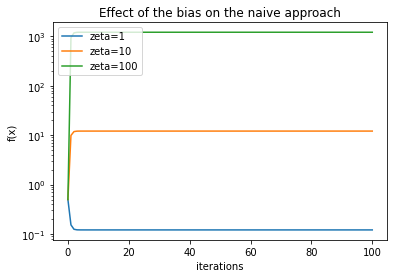

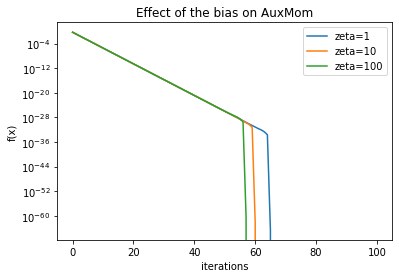

In [8]:
plt.figure()
for z in Zs:
    plt.plot(ResN[z],label=r"zeta="+ str(z))
    plt.xlabel("iterations")
    plt.ylabel("f(x)")
    plt.yscale("log")
    plt.title("Effect of the bias on the naive approach")
    plt.legend()
    plt.savefig("EffectOfZetaNaive.pdf")
plt.figure()
for z in Zs:
    plt.plot(ResA[z],label=r"zeta="+ str(z))
    plt.yscale("log")
    plt.xlabel("iterations")
    plt.ylabel("f(x)")
    plt.title("Effect of the bias on AuxMom")
    plt.legend()
    plt.savefig("EffectOfZetaALG.pdf")

## Effect of $\delta$

In [15]:
Ds = [2,10,100]
z = 1
T = int(1e2)
K = 10
x0 = 1
ResN = {}
ResA = {}
for d in Ds:
    eta = min(.5,1/(d*K))
    h = funch(-d,z)
    ResN[d] = Naive(T,K,eta,f,h,x0)
    ResA[d] = Alg(T,K,eta,f,h,x0)

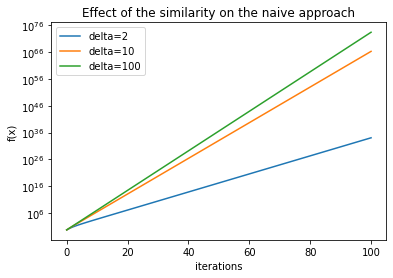

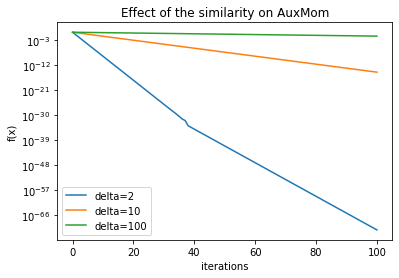

In [16]:
plt.figure()
for d in Ds:
    plt.plot(ResN[d],label=r"delta="+ str(d))
    plt.xlabel("iterations")
    plt.ylabel("f(x)")
    plt.yscale("log")
    plt.title("Effect of the similarity on the naive approach")
    plt.legend()
    #plt.savefig("EffectOfZetaNaive.pdf")
plt.figure()
for d in Ds:
    plt.plot(ResA[d],label=r"delta="+ str(d))
    plt.yscale("log")
    plt.xlabel("iterations")
    plt.ylabel("f(x)")
    plt.title("Effect of the similarity on AuxMom")
    plt.legend()
    #plt.savefig("EffectOfZetaALG.pdf")